
# Assignment 5
#K means Clustering
#Author: Shreya Dubey

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import sklearn
from sklearn import metrics
sns.set()
from sklearn.model_selection import train_test_split
import warnings
import math
import copy
from itertools import combinations
from scipy.misc import comb
warnings.filterwarnings("ignore",category=FutureWarning)
warnings.filterwarnings("ignore",category=DeprecationWarning)

#Reading the csv file 
dataset = pd.read_csv("spiral-dataset.csv")

# Changing into numpy
dataset = dataset.values

true_class = dataset[:,2]

In [2]:
# function to calculate random index
def rand_index (labels_true, labels_pred):
    my_pair = list(combinations(range(len(labels_true)), 2)) #create list of all combinations with the length of labels.
    def is_equal(x):
        return (x[0]==x[1])
    my_a = 0
    my_b = 0
    for i in range(len(my_pair)):
            if(is_equal((labels_true[my_pair[i][0]],labels_true[my_pair[i][1]])) == is_equal((labels_pred[my_pair[i][0]],labels_pred[my_pair[i][1]])) 
               and is_equal((labels_pred[my_pair[i][0]],labels_pred[my_pair[i][1]])) == True):
                my_a += 1
            if(is_equal((labels_true[my_pair[i][0]],labels_true[my_pair[i][1]])) == is_equal((labels_pred[my_pair[i][0]],labels_pred[my_pair[i][1]])) 
               and is_equal((labels_pred[my_pair[i][0]],labels_pred[my_pair[i][1]])) == False):
                my_b += 1
    my_denom = comb(len(labels_true),2)
    ri = (my_a + my_b) / my_denom
    return ri

# function to calculate SSE
def getSSE(dataset,centers_new,clusters):
    sum1 = 0
    for i in range (clusters.shape[0]):
        if(clusters[i]==1):
            dist = getDistance(dataset[i,:],centers_new[0])
            sum1 = sum1 + (dist**2)
        if(clusters[i]==2):
            dist = getDistance(dataset[i,:],centers_new[0])
            sum1 = sum1 + (dist**2)
        if(clusters[i]==3):
            dist = getDistance(dataset[i,:],centers_new[0])
            sum1 = sum1 + (dist**2)
    return sum1

# function to claculate l2 distance
def getDistance(point1,point2):
    dist = math.sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)
    return dist

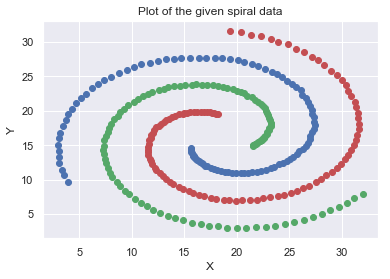

In [3]:
X = dataset[:,0]
Y = dataset[:,1]

# Task 1

X1 = []
X2 = []
X3 = []
Y1 = []
Y2 = []
Y3 = []

for i in range(dataset.shape[0]):
    if(dataset[i,2]==1):
        X1.append(dataset[i,0])
        Y1.append(dataset[i,1])
    if(dataset[i,2]==2):
        X2.append(dataset[i,0])
        Y2.append(dataset[i,1])
    if(dataset[i,2]==3):
        X3.append(dataset[i,0])
        Y3.append(dataset[i,1])


plt.plot(X1,Y1,'or')
plt.plot(X2,Y2,'ob')
plt.plot(X3,Y3,'og')
plt.title("Plot of the given spiral data")
plt.xlabel('X')  
plt.ylabel('Y') 
  
# function to show the plot 
plt.show() 

In [4]:
dataset = np.delete(dataset,2,axis = 1)

# Number of clusters
k = 3
# Number of training data
n = dataset.shape[0]
# Number of features in the data
c = dataset.shape[1]

Trial no. 1
Rand_Index =  0.5589496248660236
SSE =  31072.025237774586
Trial no. 2
Rand_Index =  0.5136862066122516
SSE =  33811.72507327999
Trial no. 3
Rand_Index =  0.5286915656690576
SSE =  74500.43944897957
Trial no. 4
Rand_Index =  0.4643004369692473
SSE =  14796.002683864763
Trial no. 5
Rand_Index =  0.46450655453870887
SSE =  13840.718252716797
Trial no. 6
Rand_Index =  0.5477368290873114
SSE =  20353.565060756206
Trial no. 7
Rand_Index =  0.5475307115178498
SSE =  46386.79290304708
Trial no. 8
Rand_Index =  0.4521601121279578
SSE =  75346.73738520412
Trial no. 9
Rand_Index =  0.5536730150878061
SSE =  39711.64855597627
Trial no. 10
Rand_Index =  0.5353697749196141
SSE =  43671.83456054422


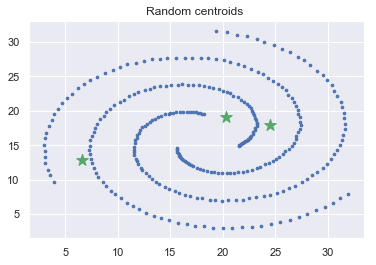

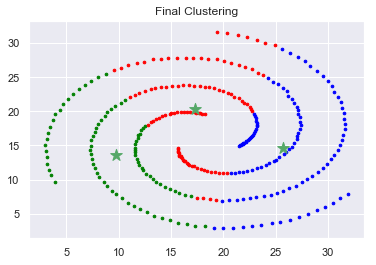

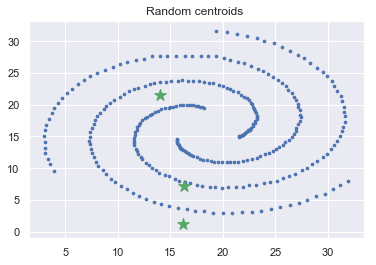

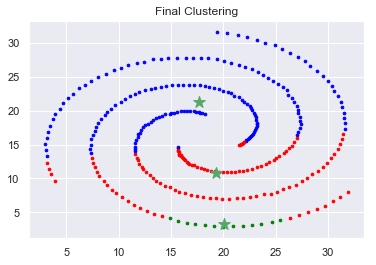

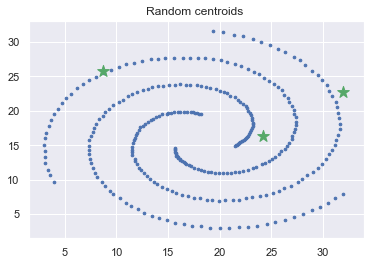

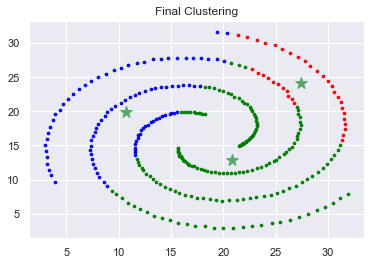

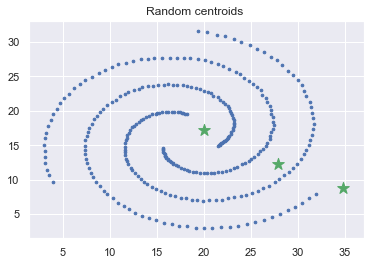

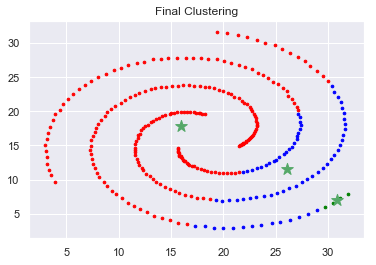

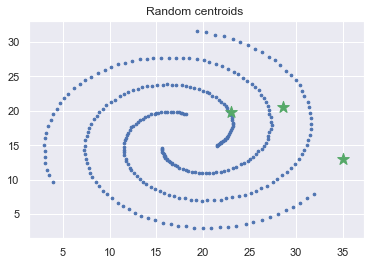

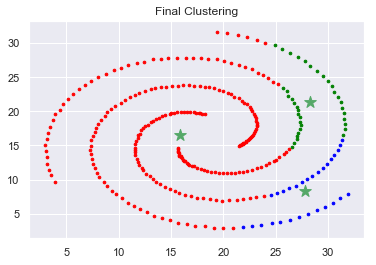

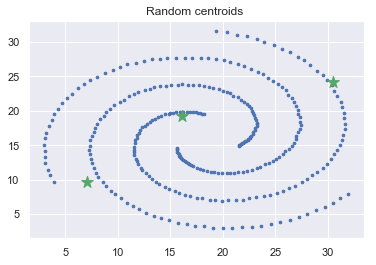

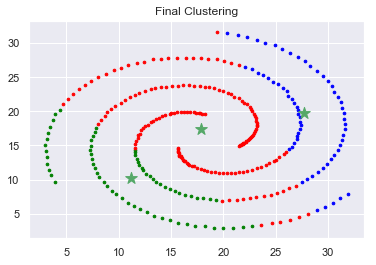

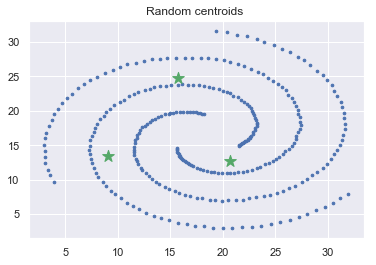

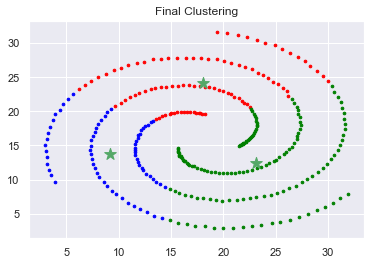

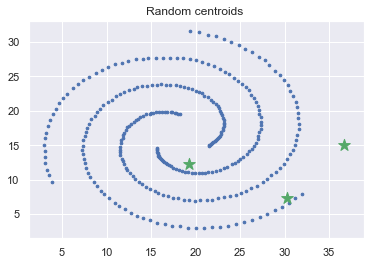

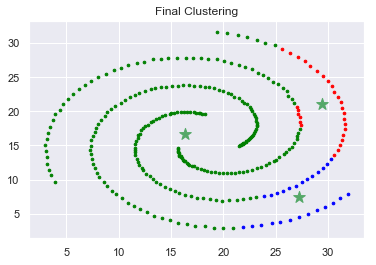

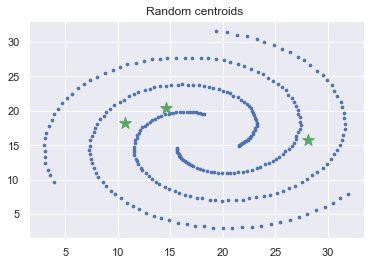

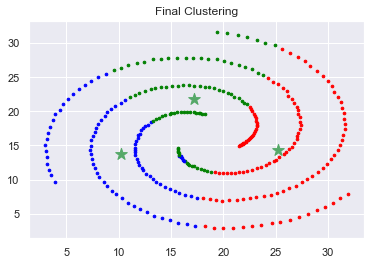

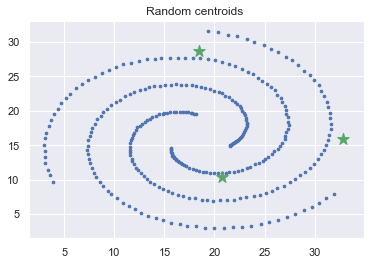

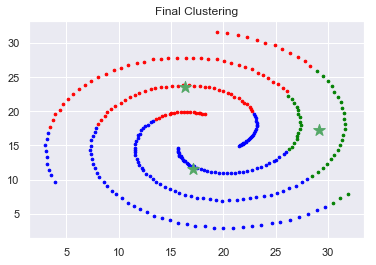

In [5]:
# Generate random centers, here we use sigma and mean to ensure it represent the whole data
def getCentre(dataset):
    mean = np.mean(dataset, axis = 0)
    std = np.std(dataset, axis = 0)
    centers = np.random.randn(k,c)*std + mean
    return centers

# Plot the data and the centers generated as random
def getStartPlot(centers,dataset):
    plt.scatter(dataset[:,0], dataset[:,1], s=7)
    plt.scatter(centers[:,0], centers[:,1], marker='*', c='g', s=150)

def getCluster(centers,dataset):
    centers_old = np.zeros(centers.shape) # to store old centers
    centers_new = copy.deepcopy(centers) # Store new centers
    clusters = np.zeros(n)
    distances = np.zeros((n,k))
    error = np.linalg.norm(centers_new - centers_old)
    # When, after an update, the estimate of that center stays the same, exit loop
    while error != 0:
        # Measure the distance to every center
        for i in range(k):
            distances[:,i] = np.linalg.norm(dataset - centers[i], axis=1)
        # Assign all training data to closest center
        clusters = np.argmin(distances, axis = 1)

        centers_old = copy.deepcopy(centers_new)
        # Calculate mean for every cluster and update the center
        for i in range(k):
            centers_new[i] = np.mean(dataset[clusters == i], axis=0)
        error = np.linalg.norm(centers_new - centers_old)
    return centers_new,clusters

    # Plot the data and the centers generated as random
def plotResult(dataset,centers_new,clusters):
    colors=['red', 'blue', 'green']
    for i in range(n): 
        plt.scatter(dataset[i, 0], dataset[i,1], s=7, color = colors[int(clusters[i])])
    plt.scatter(centers_new[:,0], centers_new[:,1], marker='*', c='g', s=150)
    clusters = clusters+1

for f in range(10):
    print("Trial no.",f+1)
    centers = getCentre(dataset)
    plt.figure()
    plt.title("Random centroids ")
    getStartPlot(centers,dataset)
    centers_new, clusters = getCluster(centers,dataset)
    plt.figure();
    plt.title("Final Clustering")
    plotResult(dataset,centers_new,clusters)
    print("Rand_Index = ",rand_index(true_class,clusters))
    print("SSE = ",getSSE(dataset,centers_new,clusters))

The best random index value that we see from the 10 runs is 0.5589496248660236 (Trial no.1)
The best SSE value that we see from the 10 runs is 13840.718252716797 (Trial no. 5)

